# Interpolação polinomial

### Bibliotecas

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import sys, os, inspect
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

from functools import reduce
import sistemas_lineares.linsys as linsys

## Definição dos pontos

| i | x | y |
|:-:|:-:|:-:|
| 0 | 0,1 | 3 |
| 1 | 2 | 2,5 |
| 2 | 3 | 0,5 |

In [2]:
xi = [0.1,   2,   3]
yi = [  3, 2.5, 0.5]

## Fórmula de Lagrange

A fórmula de lagrange para calcular um polinômio interpolador de grau $x$ é definida como:

$$
P_n(x) = \sum_{i=0}^{n} y_i \prod_{j=0\newline j \neq i}^{n} \frac{x-x_j}{x_i-x_j}
$$

In [3]:
lagrange = lambda x : sum(yi[i]*reduce(lambda a,b : a*b, [(x-xi[j])/(xi[i]-xi[j]) for j in range(len(xi)) if j!=i],1) for i in range(len(xi)))

v = 2.1
vb = lagrange(v)

print(vb)

2.3539019963702357


### Gráfico do polinômio interpolado

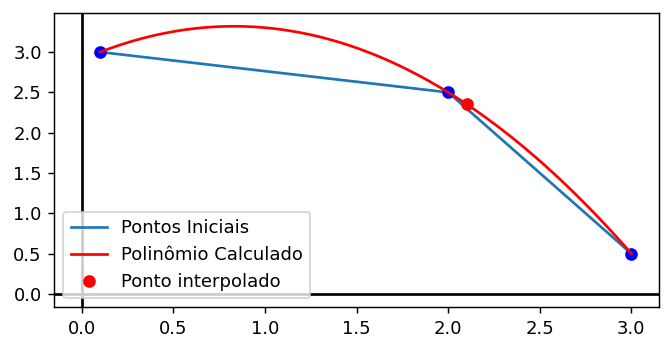

In [4]:
plt.figure(figsize=(6, 3), dpi=130)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(xi, yi, label="Pontos Iniciais")

xarr = np.linspace(xi[0],xi[-1],100)

for px,py in zip(xi,yi) : plt.plot(px, py, 'bo')

plt.plot(xarr,lagrange(xarr),color='red', label="Polinômio Calculado")

plt.plot(v, vb, 'ro', label="Ponto interpolado")

plt.legend(loc="lower left")

plt.show()

## Método matricial

#### Regra de criação:

Seguir a criação para um polinômio de grau $n$:

$P_n(x) = a_0+a_1x + a_2x^2 + \cdots + a_nx^n$

Onde trata-se $x$ como o valor conhecido a partir dos pontos e os valores de $a$ como incógnitas para serem determinadas.

Para isso, cria-se um sistema:

$
\begin{bmatrix}
    1      & x_0    & x_0^2  & \dots  & x_0^m \\
    1      & x_1    & x_1^2  & \dots  & x_1^m \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1      & x_n    & x_n^2  & \dots  & x_n^m \\
\end{bmatrix}
\cdot
\begin{bmatrix}
    a_0 \\
    a_1 \\
    \vdots \\
    a_n \\
\end{bmatrix}
=
\begin{bmatrix}
    y_0 \\
    y_1 \\
    \vdots \\
    y_n \\
\end{bmatrix}
$

Seguindo $A \cdot x = \vec{b}$, podemos determinar $x$ utilizando métodos para resolver sistemas lineares.

#### Definir a matriz a partir dos pontos

In [5]:
A = np.array([[i**j for j in range(len(xi))] for i in xi])
b = np.array(yi).reshape(-1,1)

print("A=",A,"\nb=",b,sep='\n')

A=
[[1.   0.1  0.01]
 [1.   2.   4.  ]
 [1.   3.   9.  ]]

b=
[[3. ]
 [2.5]
 [0.5]]


In [6]:
x = linsys.invMatSolve(A,b)

print("x=",x,"\nA.x=", A.dot(x), sep='\n')

x=
[[ 2.90653358]
 [ 0.99455535]
 [-0.59891107]]

A.x=
[[3. ]
 [2.5]
 [0.5]]


### Passo final: Interpolação

Com os valores preparados, resta utilizar o vetor $x$ calculado, gerando uma nova linha para a interpolação, no formato:

$
\begin{bmatrix}
    1 & v & v^2 & \cdots & v^n
\end{bmatrix}_{1xn}
\cdot x_{nx1} = \bar{v}
$

Onde $v$ é o valor a ser interpolado, e $\bar{v}$ é o valor interpolado.

In [10]:
v = 2.1
vb = np.array([v**i for i in range(len(xi))]).dot(x)[0]

print(vb)

2.353901996370235


### Gráfico do polinômio interpolado

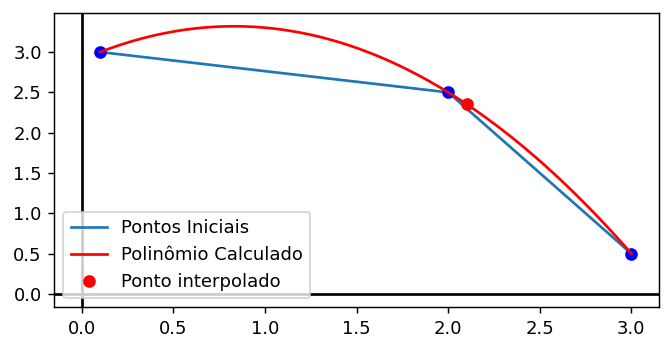

In [8]:
f = lambda v : sum(x[i][0]*v**i for i in range(len(xi)))

plt.figure(figsize=(6, 3), dpi=130)

plt.axhline(0, color='black')
plt.axvline(0, color='black')

plt.plot(xi, yi, label="Pontos Iniciais")

xarr = np.linspace(xi[0],xi[-1],100)

for px,py in zip(xi,yi) : plt.plot(px, py, 'bo')

plt.plot(xarr,f(xarr),color='red', label="Polinômio Calculado")

plt.plot(v, vb, 'ro', label="Ponto interpolado")

plt.legend(loc="lower left")

plt.show()